# **_<div class="alert alert-success"><font color='darkred'> Tutorials: Machine Learning</font></div>_**

### **_<div class="alert alert-success"><font color='darkblue'> @Yonatan Tarazona Coronel</font></div>_**

## 1.0. Neural Network (NN)

Landsat-8 OLI (Operational Land Imager) will be used to obtain in order to classify using Neural Network (NN). This image, which is in surface reflectance, contain bands:
- Blue -> B2
- Green -> B3 
- Red -> B4
- Nir -> B5
- Swir1 -> B6
- Swir2 -> B7

This image will be downloaded using the following codes:

In [6]:
import requests, zipfile
from io import BytesIO

# Defining the zip file URL
url = 'https://github.com/ytarazona/ft_data/raw/main/data/LC08_232066_20190727.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
req = requests.get(url)

# extracting the zip file contents
file = zipfile.ZipFile(BytesIO(req.content))
file.extractall()

Libraries to be used:

In [11]:
import os
import rasterio
import earthpy.plot as ep
import matplotlib.pyplot as plt

In [14]:
cp = os.getcwd()
path_img = cp.replace(os.sep, '/') + '/' + 'LC08_232066_20190727.jp2'

img = rasterio.open(path_img)

In [15]:
img_array = img.read()

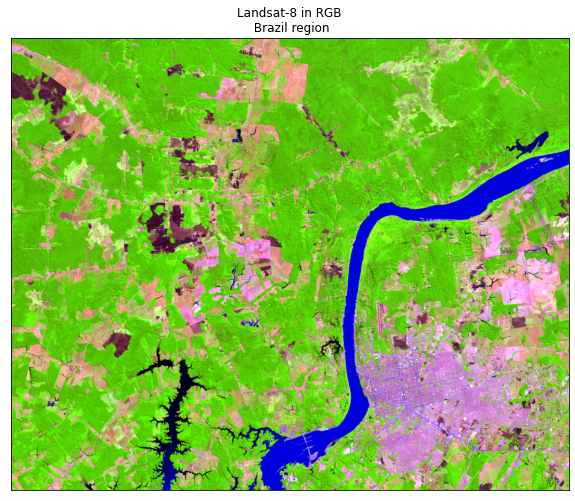

In [16]:
ep.plot_rgb(img_array,
            rgb = [4, 3, 2],
            stretch = True,
            title = "Landsat-8 in RGB\n Brazil region")
plt.show()

In [1]:
import os

os.chdir(r'F:\RepositoriosGitHub\EOpy\eopy')

from mla import *

How to run Neural Network with Python and the EOpy package.

In [69]:
import matplotlib.pyplot as plt
from dbfread import DBF
import rasterio

path_raster = r"I:\DocenteUniversidades\Clases_UNALM\Investigacion\Clasificacion\raster\LT05_198032_1987_MDE_Vilca.tif"
img = rasterio.open(path_raster)

path_endmembers = r"I:\DocenteUniversidades\Clases_UNALM\Investigacion\Clasificacion\endmembers2\endmembers_1987.dbf"
endmembers = DBF(path_endmembers)

In [94]:
clas = mla(image = img, endmembers = endmembers)
classi = clas.RF(training_split = 0.5)

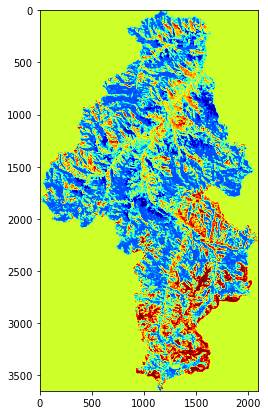

In [48]:
# kmeans
plt.figure(figsize=(7,7))
plt.imshow(classi.get('Classification_Map'), cmap = 'jet')
plt.show()

In [98]:
import writeRaster as wr
wr.writeRaster(arr = classi.get('Classification_Map'), 
               image = classi.get('Image'), 
               filename = 'Coberturas1987_RF')

In [95]:
classi.get('Overall_Accuracy')

0.6291666666666667

In [96]:
classi.get('Kappa_Index')

0.5553890345947297

In [97]:
classi.get('Confusion_Matrix')

,0,1,2,3,4,5,Total,Users_Accuracy,Commission
0,27.000000,3.000000,16.000000,1.000000,5.000000,4.000000,56.0,48.214286,51.785714
1,1.000000,28.000000,0.000000,6.000000,0.000000,4.000000,39.0,71.794872,28.205128
2,3.000000,0.000000,23.000000,0.000000,7.000000,0.000000,33.0,69.696970,30.303030
3,0.000000,0.000000,0.000000,28.000000,0.000000,7.000000,35.0,80.000000,20.000000
4,7.000000,1.000000,4.000000,0.000000,27.000000,9.000000,48.0,56.250000,43.750000
5,1.000000,4.000000,0.000000,4.000000,2.000000,18.000000,29.0,62.068966,37.931034
Total,39.000000,36.000000,43.000000,39.000000,41.000000,42.000000,NaN,NaN,NaN
Producer_Accuracy,69.230769,77.777778,53.488372,71.794872,65.853659,42.857143,NaN,NaN,NaN
Omission,30.769231,22.222222,46.511628,28.205128,34.146341,57.142857,NaN,NaN,NaN


## 2.0. K-means

In [ ]:
import matplotlib.pyplot as plt
from dbfread import DBF
import rasterio

path_raster = r"G:\4_RS_Python\Leccion4\Datos\232066\LC08_SUBSET_232066_20190727_STACK.tif"
img = rasterio.open(path_raster)

img.read().shape
clas = rkmeans(image = img, n_clusters = 4)

In [ ]:
# kmeans
plt.figure(figsize=(7,7))
plt.imshow(clas, cmap = 'jet')
plt.show()

In [ ]:
import writeRaster as wr
import os
wr.writeRaster(arr = classi.get('Classification_Map'), 
           image = classi.get('Image'),
           filename = 'img2')